# feature_selection with corerelation : 

which feature having highly coreletion between them : 
    they are droped becouse it take placed like a duplicates : 

In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing 
ch = fetch_california_housing () 

df = pd.DataFrame( ch.data, columns = ch.feature_names)

In [102]:
X = df
y = ch.target 

In [103]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size = 0.3, random_state= 42)

X_train.shape,y_train.shape

((14448, 8), (14448,))

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt 

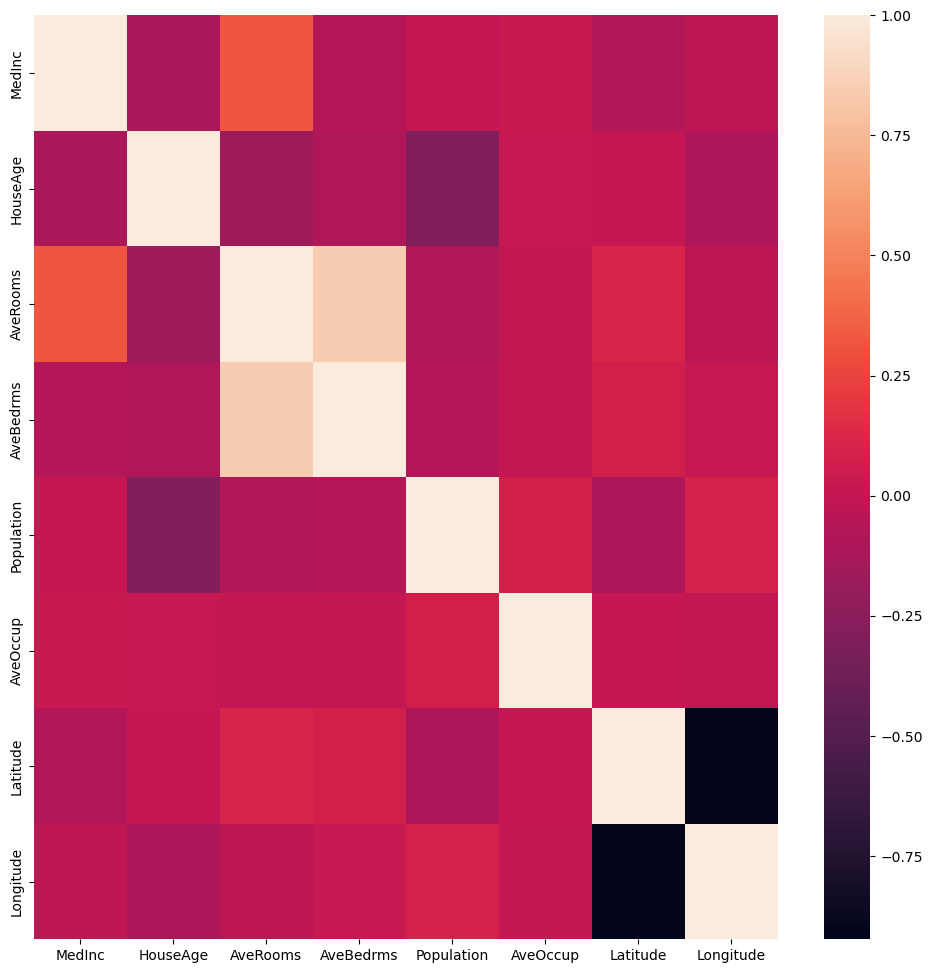

In [105]:
plt.figure(figsize=(12,12))
corr = X_train.corr()
sns.heatmap(X_train.corr())
plt.show()

In [106]:
def corelation (df, threshold) : 
    new_col = [] 
    for i in df.columns : 
        for j in df.columns:
            if i!=j : # chek the core() with each other column 
                if abs(df[i].corr(df[j])) >threshold:
                    if (j,i) not in new_col: #(i,j) is alrady 
                        new_col.append((i,j))
    return new_col

In [107]:
drop = corelation(X_train,0.85)


In [108]:
df.drop(columns= drop[0][0] , inplace= True)
df.head(3) 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,-122.24
